In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,fbeta_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [142]:
dataset=pd.read_csv('Features.csv',names=['person','time','xAxis','yAxis','zAxis','magnitude'])


In [143]:
user_list=['user1','user2','user3','user4','user5']

In [144]:
X=dataset.iloc[:,1:].values
y=dataset.iloc[:,0].values


Decision Tree


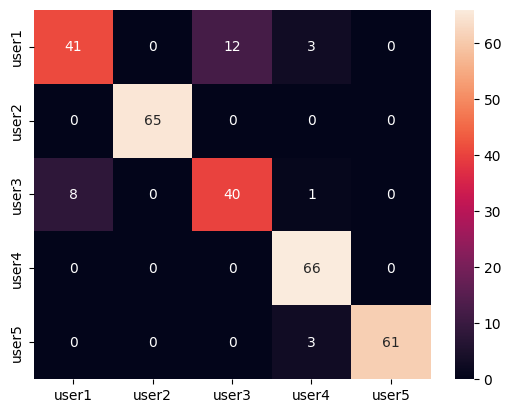

Precision:   [0.83673469 1.         0.76923077 0.90410959 1.        ]
Recall:      [0.73214286 1.         0.81632653 1.         0.953125  ]
F1 Score:    [0.78095238 1.         0.79207921 0.94964029 0.976     ]
Support:     [56 65 49 66 64]
F2 Score:    0.9092459275616016
Cross val score: [0.64666667 0.60333333 0.66666667 0.62666667 0.47666667]
Support Vector Machine


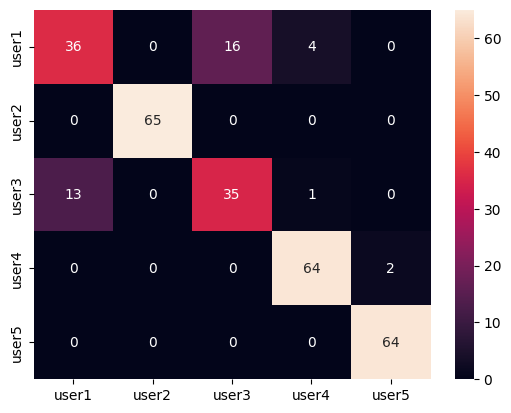

Precision:   [0.73469388 1.         0.68627451 0.92753623 0.96969697]
Recall:      [0.64285714 1.         0.71428571 0.96969697 1.        ]
F1 Score:    [0.68571429 1.         0.7        0.94814815 0.98461538]
Support:     [56 65 49 66 64]
F2 Score:    0.8788852800294448
Cross val score: [0.71333333 0.87       0.89666667 0.89333333 0.72666667]
Naive Bayes


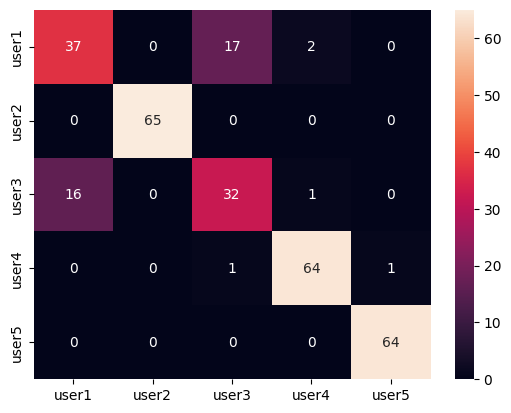

Precision:   [0.69811321 1.         0.64       0.95522388 0.98461538]
Recall:      [0.66071429 1.         0.65306122 0.96969697 1.        ]
F1 Score:    [0.67889908 1.         0.64646465 0.96240602 0.99224806]
Support:     [56 65 49 66 64]
F2 Score:    0.8729263676649562
Cross val score: [0.71333333 0.86333333 0.86       0.87       0.73333333]
KNN


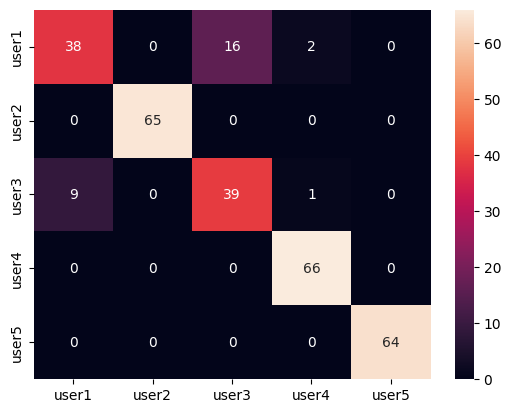

Precision:   [0.80851064 1.         0.70909091 0.95652174 1.        ]
Recall:      [0.67857143 1.         0.79591837 1.         1.        ]
F1 Score:    [0.73786408 1.         0.75       0.97777778 1.        ]
Support:     [56 65 49 66 64]
F2 Score:    0.9057837570299898
Cross val score: [0.75       0.78666667 0.78       0.76333333 0.77333333]


In [145]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the models to be compared
models = {
    'Decision Tree':DecisionTreeClassifier(),
    'Support Vector Machine':SVC(),
    'Naive Bayes':GaussianNB(),
    'KNN':KNeighborsClassifier(n_neighbors=5)
}
model_names=models.keys()
f2_score=[]
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)
    scores=cross_val_score(model,X,y,cv=5)



    sns.heatmap(cm,annot=True,xticklabels=user_list,yticklabels=user_list)
    plt.title(name+' Confusion MAtrix')
    plt.show()
    # print the results
    print(f'{"Precision:": <12} {precision}')
    print(f'{"Recall:": <12} {recall}')
    print(f'{"F1 Score:": <12} {f1_score}')
    print(f'{"Support:": <12} {support}')
    print(f'{"F2 Score:": <12} {f2}')
    print(f'{"Cross val score:": <12} {scores}')